<a href="https://colab.research.google.com/github/prasanna-venkatesh-m/salary-prediction-linear-regression/blob/main/Salary_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the pandas and numpy packages

In [ ]:
import pandas as pd
import numpy as np

Upload the Dataset in the folder and get the path of it. Using the pandas read the csv file (which is converted to Dataframe)

In [ ]:
df = pd.read_csv('/content/Salary_dataset.csv')

In [ ]:
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


Removed the S.No Column which is useless

In [ ]:
data = df.drop('Unnamed: 0', axis=1)

In [ ]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.413333,76004.000000
std,2.837888,27414.429785
min,1.200000,37732.000000
25%,3.300000,56721.750000
50%,4.800000,65238.000000
75%,7.800000,100545.750000
max,10.600000,122392.000000


With this correlation between feature we assume that we have positive correlation between Years of Expirence and Salary

In [ ]:
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


We plotting the Graph to Visualize the data we had. Importing the Matplot lib package and Using the Pyplot to plot the Graph.

We can initialize the Figure size.
Scatter is used to plot the points

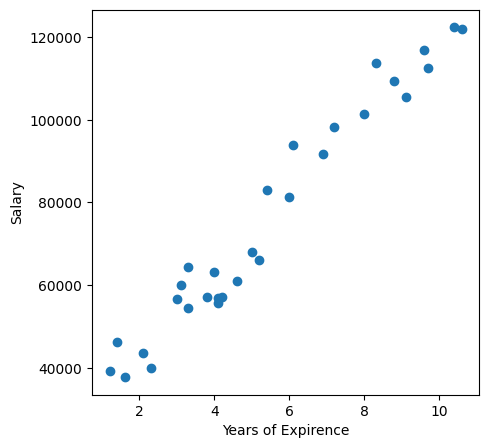

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
plt.scatter(data['YearsExperience'], data['Salary'])
plt.xlabel('Years of Expirence')
plt.ylabel('Salary')
plt.show()

Splitting our Features and Targets as x,y

In [ ]:
x = data.drop('Salary', axis=1)
y = df['Salary']

From SkLearn imported the train_test_split which we get 3 paramaters x,y and test size.

split that data and give the training and testing data set based on the test size

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =train_test_split(x,y,test_size=0.2)

From SKLearn linear_model We get LinearRegression

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

Y = mx+b

m = coef_ (which is represented as array of weights (values))

b = intercept_ (which is represented as bias)

In [ ]:
print(lr.coef_)
print(lr.intercept_)

[9549.10183918]
24384.073371096267


Predict is used to predict the dataset with our model

In [ ]:
y_train_pred = lr.predict(X_train)

In this figure

Blue dots are the points of actual Target data

Red lines is the data that our model predicted

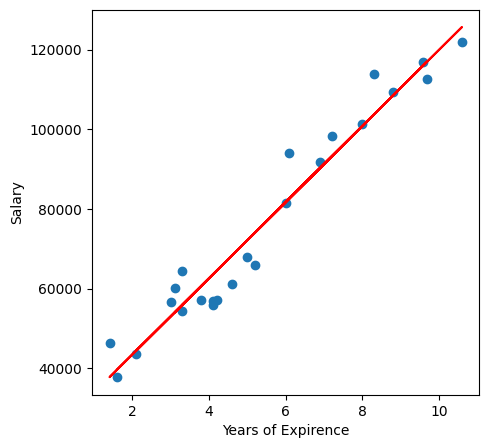

In [ ]:
plt.figure(figsize=(5,5))
plt.scatter(X_train, y_train)
plt.plot(X_train, y_train_pred, color='r')
plt.xlabel('Years of Expirence')
plt.ylabel('Salary')
plt.show()

import the metrices from sklearn.metrices


MAE - Mean Absoulte Error (how much your predictions are off by)

MSE - Mean Squared Error (average of the squared differences between actual and predicted values.)

MAPE - Mean Absolute Percentage Error (average of absolute percentage differences between actual and predicted values)

R2 Score - proportion of variance in the target

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score, mean_absolute_error

mse = mean_squared_error(y_train, y_train_pred)
mape = mean_absolute_percentage_error(y_train, y_train_pred)
r2 = r2_score(y_train, y_train_pred)
mar = mean_absolute_error(y_train, y_train_pred)

In [ ]:
print(f'MSE : {mse}')
print(f'MAPE : {mape}')
print(f'MAE : {mar}')
print(f'R2 : {r2}')

MSE : 33379604.513623863
MAPE : 0.07082555830293996
MAE : 4776.433506972392
R2 : 0.9496355425417694


In [ ]:
y_pred = lr.predict(X_test)

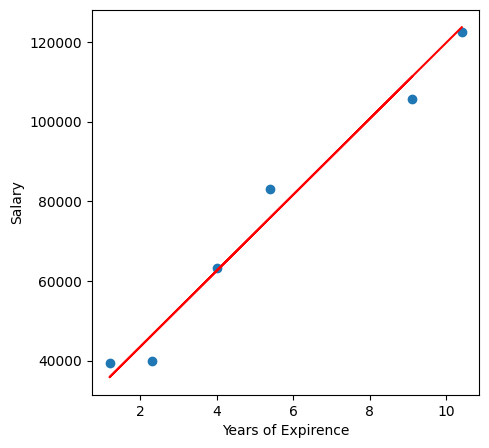

In [ ]:
plt.figure(figsize=(5,5))
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color='r')
plt.xlabel('Years of Expirence')
plt.ylabel('Salary')
plt.show()

In [ ]:
mse = mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mar = mean_absolute_error(y_test, y_pred)

In [ ]:
print(f'MSE : {mse}')
print(f'MAPE : {mape}')
print(f'MAE : {mar}')
print(f'R2 : {r2}')

MSE : 23245241.807005156
MAPE : 0.0685726550019948
MAE : 4122.4900998068215
R2 : 0.976310193473421


# With Standardization

In [ ]:
data.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


In [ ]:
from sklearn.preprocessing import StandardScaler

X = data[['YearsExperience']]
y = data[['Salary']]

X_scaler = StandardScaler()
y_scaler = StandardScaler()

In [ ]:
X_scaled = X_scaler.fit_transform(X)
y_scaled = y_scaler.fit_transform(y)

In [ ]:

print(X_scaler.mean_)
print(X_scaler.scale_)

[5.41333333]
[2.79018916]


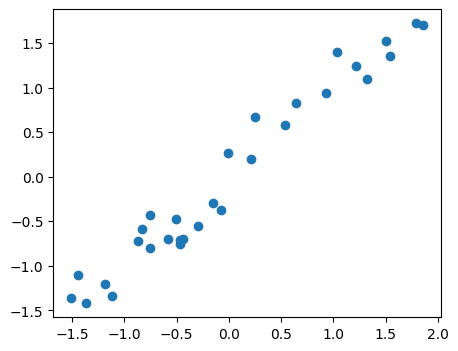

In [ ]:
plt.figure(figsize=(5,4))
plt.scatter(X_scaled, y_scaled)
plt.show()

In [ ]:
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(X_scaled, y_scaled, test_size=0.3)

In [ ]:
lr2 = LinearRegression()
lr2.fit(x_train_2, y_train_2)

LinearRegression()

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


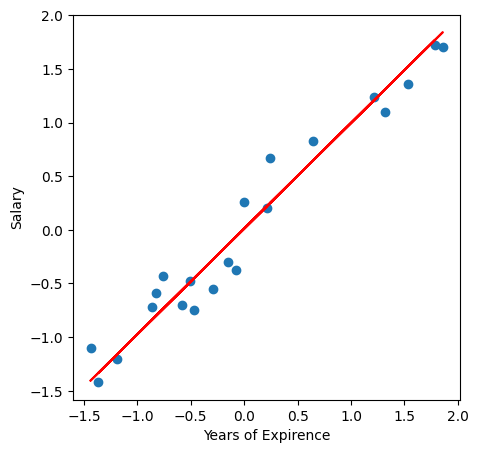

In [ ]:
y_train_pred_2 = lr.predict(x_train_2)

plt.figure(figsize=(5,5))
plt.scatter(x_train_2, y_train_2)
plt.plot(x_train_2, y_train_pred_2, color='r')
plt.xlabel('Years of Expirence')
plt.ylabel('Salary')
plt.show()

In [ ]:
print(lr2.coef_)
print(lr2.intercept_)

[[0.9340767]]
[0.00899229]


In [ ]:
mse = mean_squared_error(y_train_2, y_train_pred_2)
mape = mean_absolute_percentage_error(y_train_2, y_train_pred_2)
r2 = r2_score(y_train_2, y_train_pred_2)
mar = mean_absolute_error(y_train_2, y_train_pred_2)

print(f'MSE : {mse}')
print(f'MAPE : {mape}')
print(f'MAE : {mar}')
print(f'R2 : {r2}')

MSE : 0.0441039305772826
MAPE : 0.30924210288858295
MAE : 0.17852425894558566
R2 : 0.9517952956467588


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


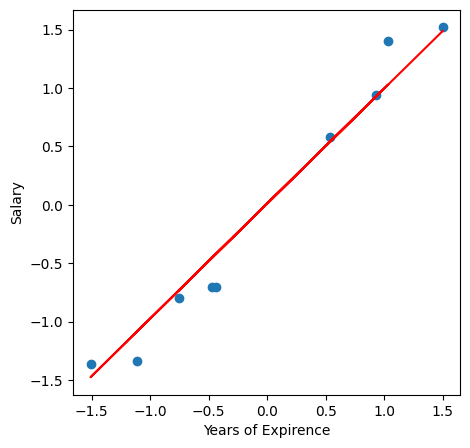

In [ ]:
y_test_pred_2 = lr.predict(x_test_2)

plt.figure(figsize=(5,5))
plt.scatter(x_test_2, y_test_2)
plt.plot(x_test_2, y_test_pred_2, color='r')
plt.xlabel('Years of Expirence')
plt.ylabel('Salary')
plt.show()

In [ ]:
mse = mean_squared_error(y_test_2, y_test_pred_2)
mape = mean_absolute_percentage_error(y_test_2, y_test_pred_2)
r2 = r2_score(y_test_2, y_test_pred_2)
mar = mean_absolute_error(y_test_2, y_test_pred_2)

print(f'MSE : {mse}')
print(f'MAPE : {mape}')
print(f'MAE : {mar}')
print(f'R2 : {r2}')

MSE : 0.04111191528236302
MAPE : 0.16731809111001125
MAE : 0.16001136801878965
R2 : 0.9655883771020333


In [ ]:
print(y_test_pred_2.shape)

(9,)


In [ ]:
y_test_actual = y_scaler.inverse_transform(y_test_pred_2.reshape(-1,1))
print(y_test_actual.astype(int))

[[116119]
 [ 90442]
 [ 64765]
 [ 36235]
 [ 63814]
 [100903]
 [ 56206]
 [103756]
 [ 46696]]


In [ ]:
X_scaler.mean_

array([5.41333333])

In [ ]:
data.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


In [ ]:
print("X mean:", X_scaler.mean_)
print("X std dev:", X_scaler.scale_)

print("y mean:", y_scaler.mean_)
print("y std dev:", y_scaler.scale_)

X mean: [1.]
X std dev: [1.]
y mean: [76004.]
y std dev: [26953.65024878]


In [ ]:
new_input = [[8.0]]
new_x_scaled = X_scaler.transform(new_input)
new_y_scaled = lr.predict(new_x_scaled)
new_y_actual = y_scaler.inverse_transform(new_y_scaled.reshape(-1,1))
print(new_y_actual)

[[100903.79940094]]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
